In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [76]:
df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

In [77]:
# Convertir les dates au format datetime
df['created_at'] = pd.to_datetime(df['created_at'])


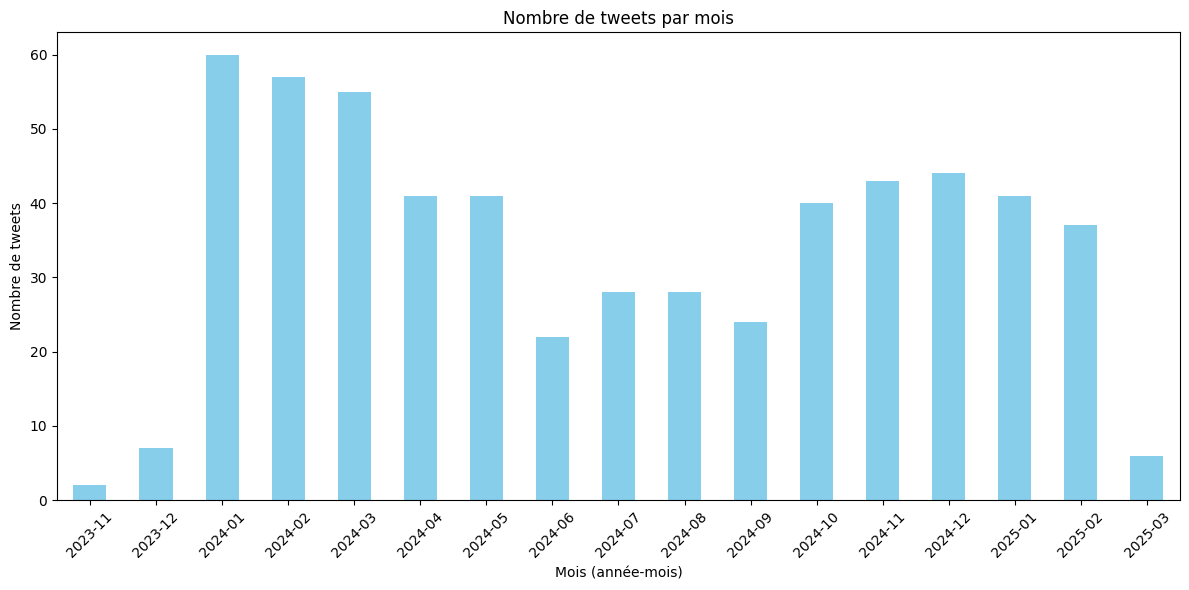

In [78]:
# Extraire l'année et le mois
df['month'] = df['created_at'].dt.to_period('M')

# Graphique des tweets par mois
tweets_par_mois = df.groupby('month')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_mois.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par mois")
plt.xlabel("Mois (année-mois)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


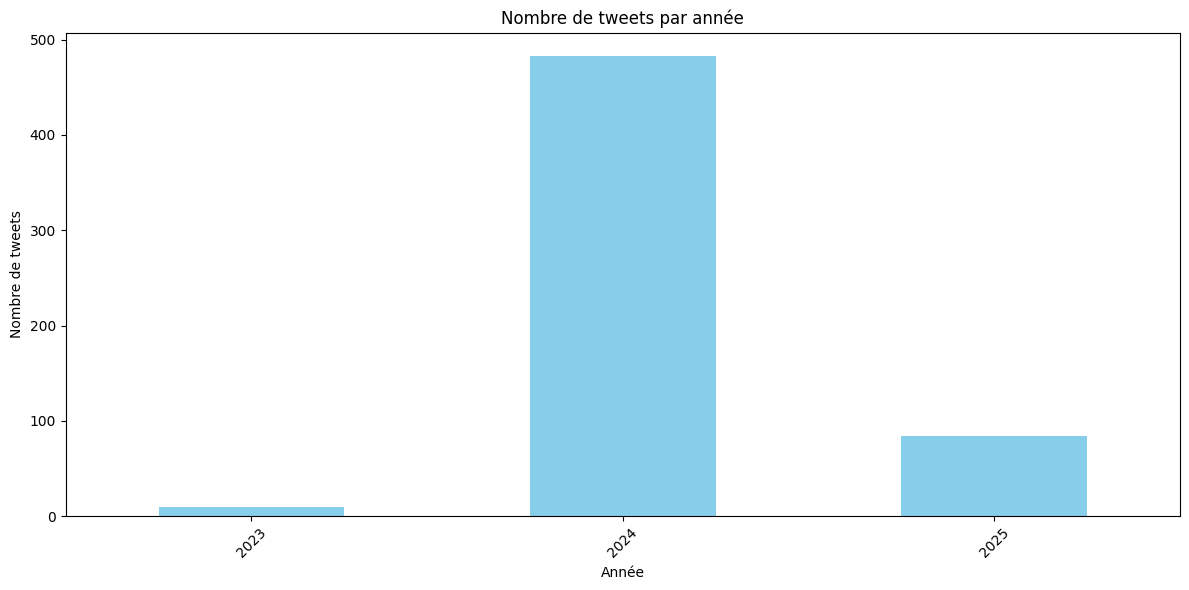

In [79]:
# Extraire l'année
df['year'] = df['created_at'].dt.year

# Graphique des tweets par année
tweets_par_annee = df.groupby('year')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_annee.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par année")
plt.xlabel("Année")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


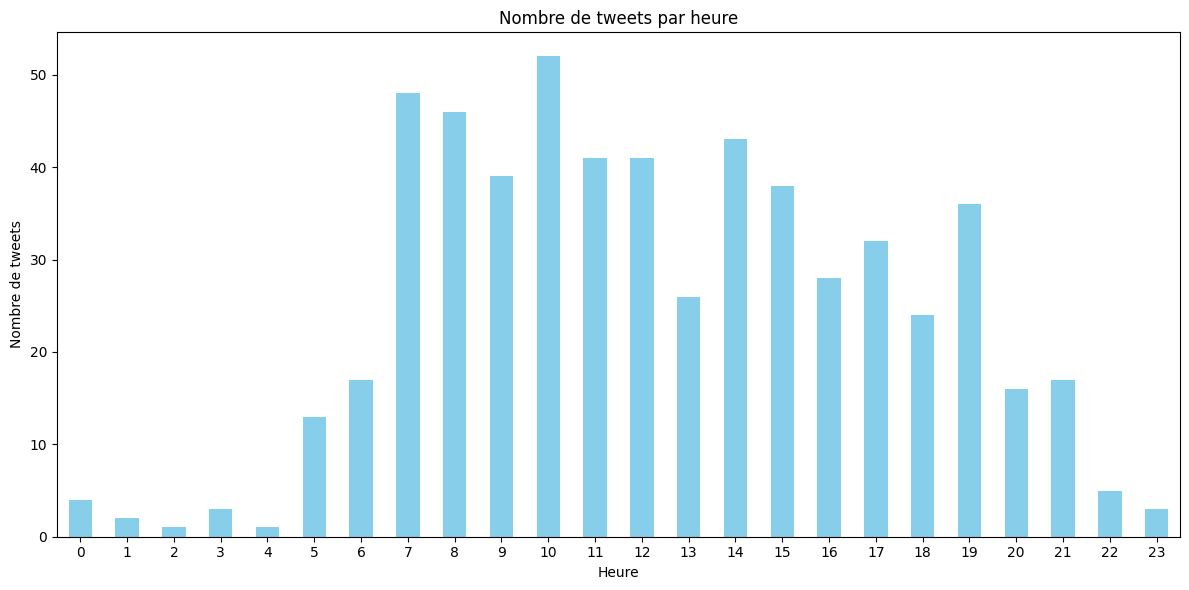

In [80]:
# Extraire l'heure de la publication du tweet
df['hour'] = df['created_at'].dt.hour

# Graphique des tweets par heure
tweets_par_heure = df.groupby('hour')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_heure.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


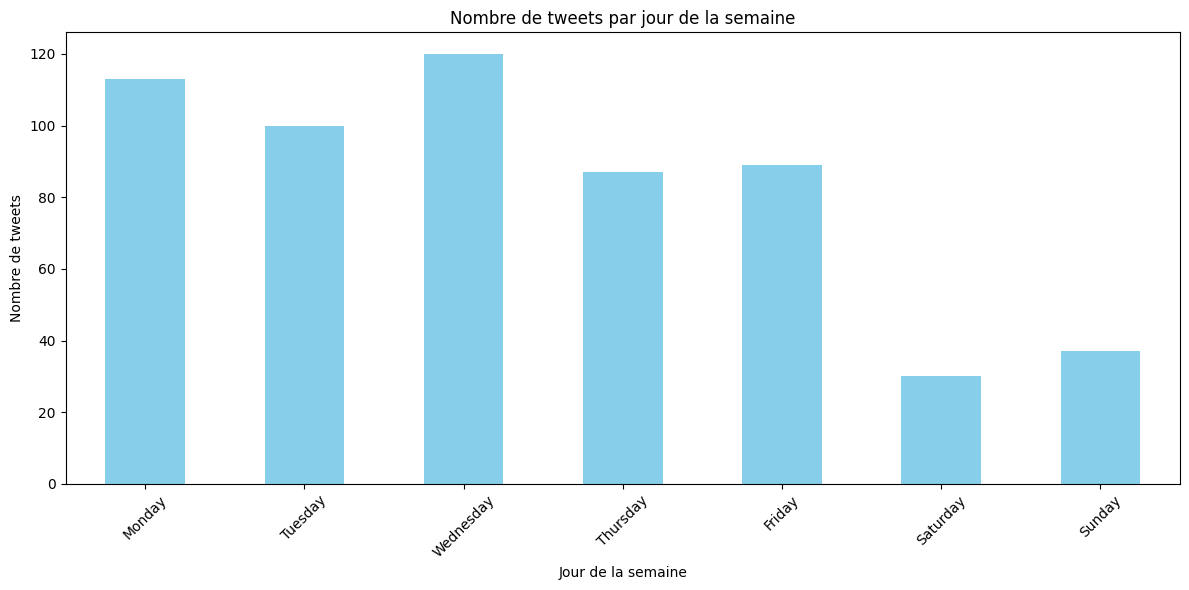

In [81]:
# Extraire le jour de la semaine
df['weekday'] = df['created_at'].dt.day_name()

# Graphique des tweets par jour de la semaine
tweets_par_jour_semaine = df.groupby('weekday')['id'].count()

# Réorganiser les jours de la semaine de manière chronologique
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweets_par_jour_semaine = tweets_par_jour_semaine[order_days]

plt.figure(figsize=(12,6))
tweets_par_jour_semaine.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


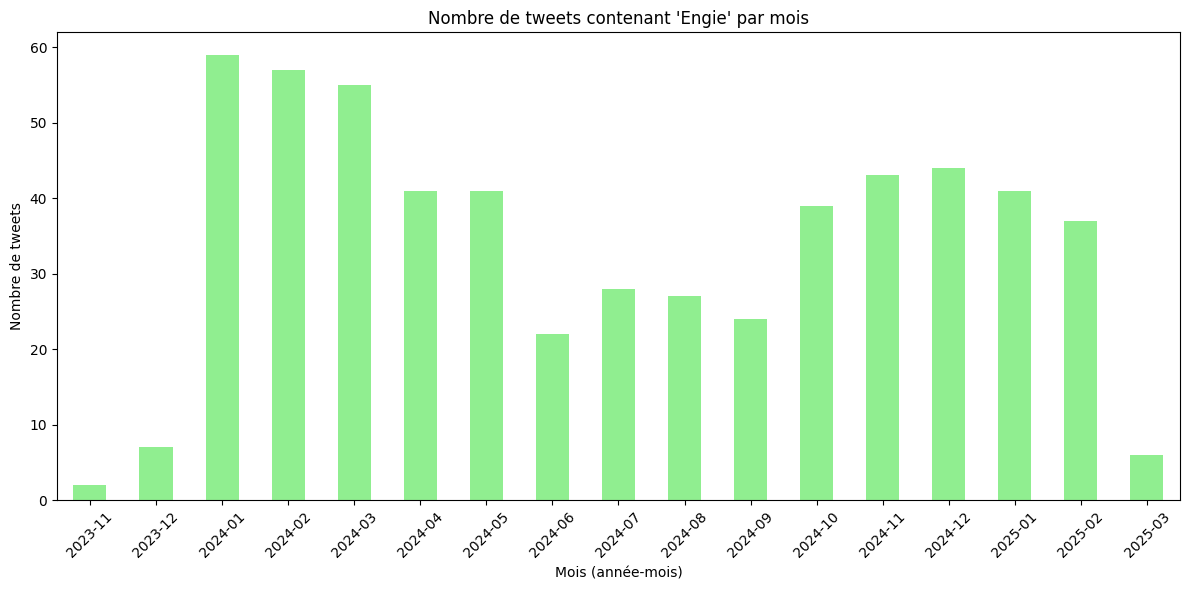

In [82]:
# Filtrer les tweets contenant le mot "Engie"
df_engie = df[df['full_text'].str.contains('Engie', case=False, na=False)]

# Graphique des tweets contenant "Engie" par mois
tweets_engie_par_mois = df_engie.groupby(df_engie['created_at'].dt.to_period('M'))['id'].count()

plt.figure(figsize=(12,6))
tweets_engie_par_mois.plot(kind='bar', color='lightgreen')
plt.title("Nombre de tweets contenant 'Engie' par mois")
plt.xlabel("Mois (année-mois)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


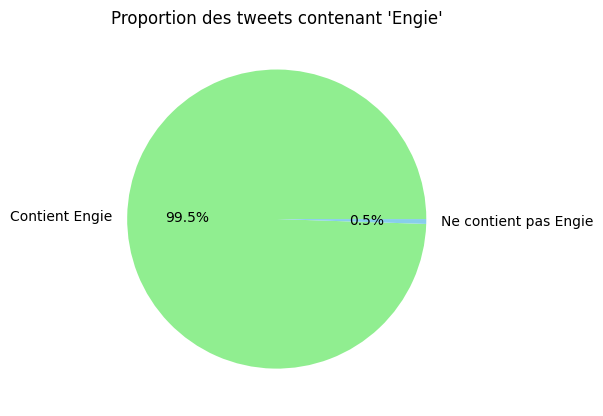

In [83]:
# Créer une colonne pour les tweets contenant "Engie"
df['contains_engie'] = df['full_text'].str.contains('Engie', case=False, na=False)

# Compter les tweets avec et sans "Engie"
tweets_engie_vs_non_engie = df['contains_engie'].value_counts()

plt.figure(figsize=(6,6))
tweets_engie_vs_non_engie.plot(kind='pie', labels=['Contient Engie', 'Ne contient pas Engie'], autopct='%1.1f%%', colors=['lightgreen', 'skyblue'])
plt.title("Proportion des tweets contenant 'Engie'")
plt.ylabel('')
plt.tight_layout()
plt.show()


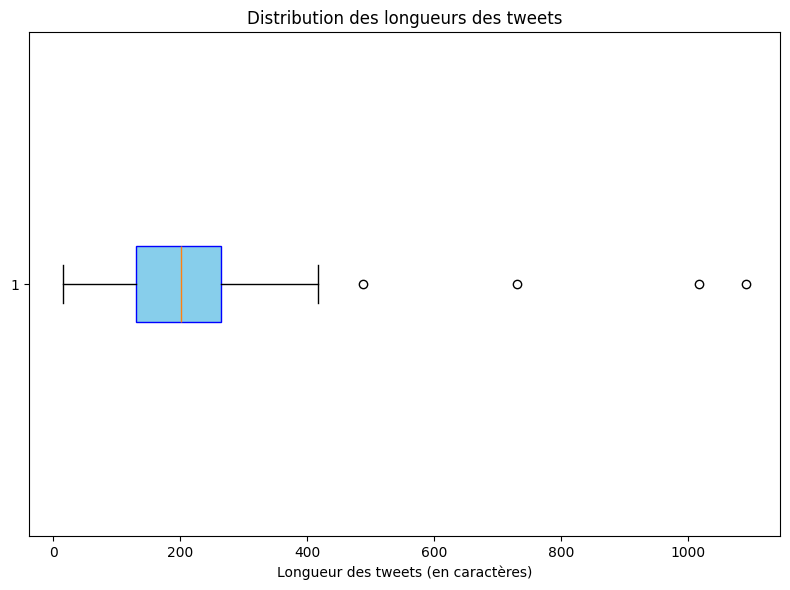

In [84]:
# Graphique en boîte de la longueur des tweets
plt.figure(figsize=(8,6))
plt.boxplot(df['text_length'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.title("Distribution des longueurs des tweets")
plt.xlabel("Longueur des tweets (en caractères)")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


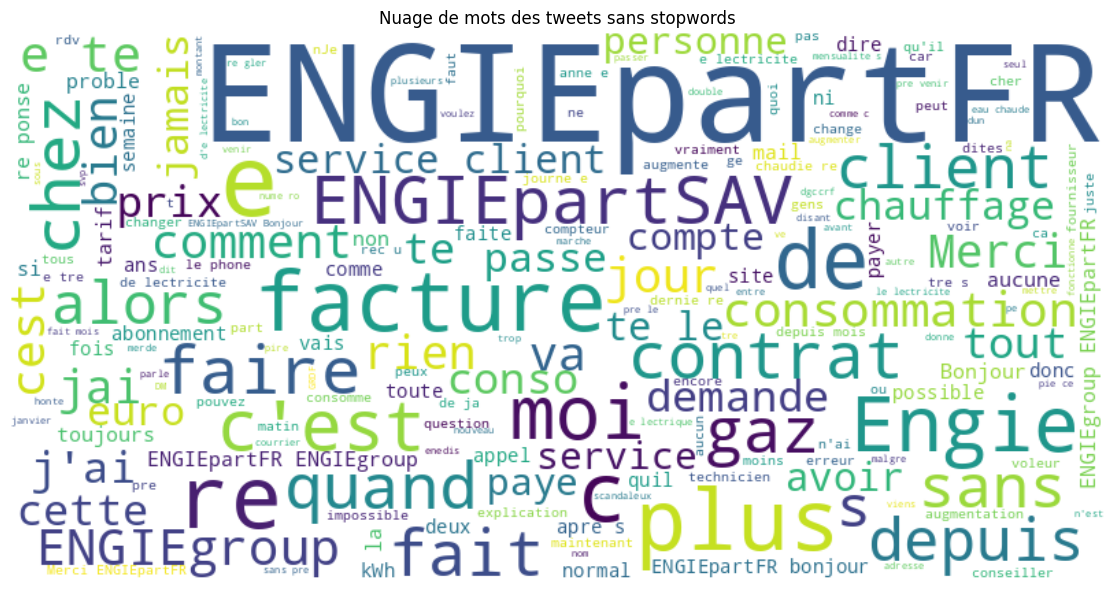

In [85]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

stop_words = set(stopwords.words('french'))

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

text_all_tweets = ' '.join(df['full_text'])

words = text_all_tweets.split()
filtered_text = ' '.join(word for word in words if word.lower() not in stop_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des tweets sans stopwords")
plt.tight_layout()
plt.show()

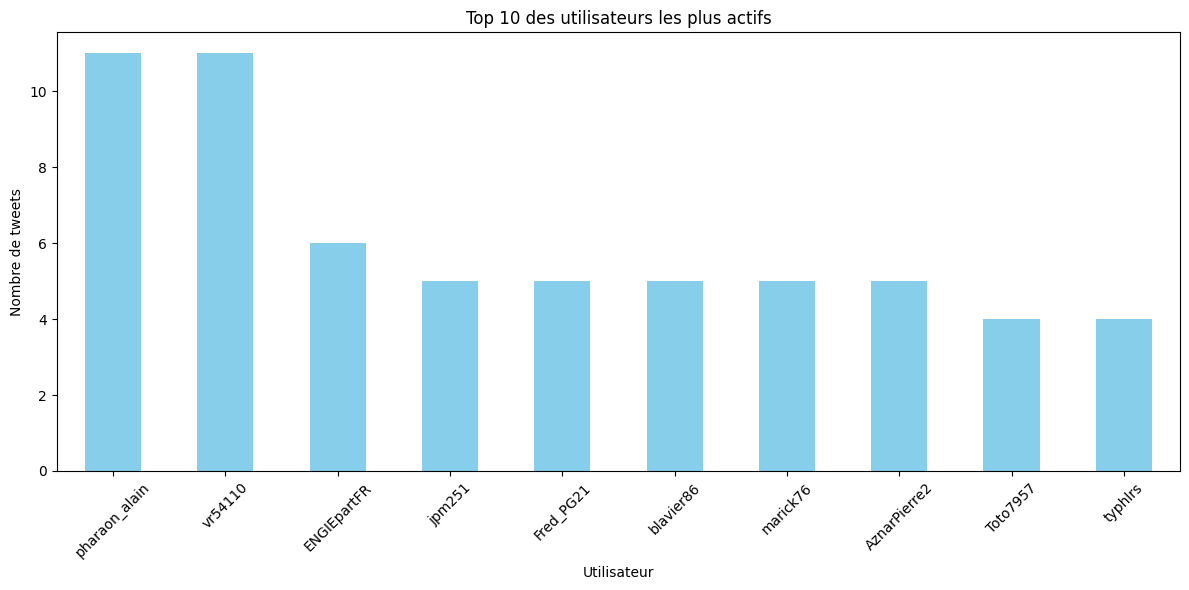

In [86]:
# Graphique du nombre de tweets par utilisateur
tweets_par_utilisateur = df['screen_name'].value_counts()

plt.figure(figsize=(12,6))
tweets_par_utilisateur.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 des utilisateurs les plus actifs")
plt.xlabel("Utilisateur")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## DATA

In [87]:

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

if df['created_at'].isnull().sum() > 0:
    print("Certaines dates n'ont pas pu être converties correctement.")

def assign_semester_and_season(month):
    if month in [1, 2, 3, 4]:
        season = "Hiver / Printemps"
        semester = "Semestre 1 (Janvier - Avril)"
    elif month in [5, 6, 7, 8]:
        season = "Printemps / Été"
        semester = "Semestre 2 (Mai - Août)"
    else:
        season = "Automne / Hiver"
        semester = "Semestre 3 (Septembre - Décembre)"
    return f"{semester} - Saison: {season}"

df['semestre_saison'] = df['created_at'].dt.month.apply(assign_semester_and_season)

df.to_csv('../Data/data_cleaned_with_analysis.csv', index=False)

print("Mise à jour terminée : colonne 'semestre_saison' avec des noms explicites et les saisons ajoutée.")


Mise à jour terminée : colonne 'semestre_saison' avec des noms explicites et les saisons ajoutée.


C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\1938644449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


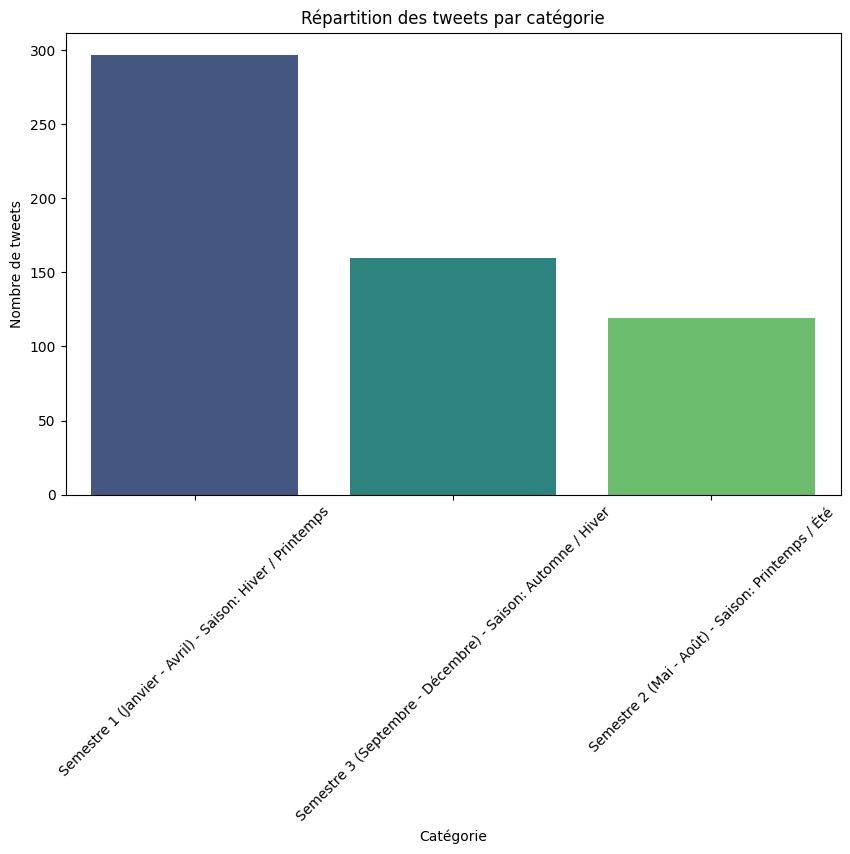

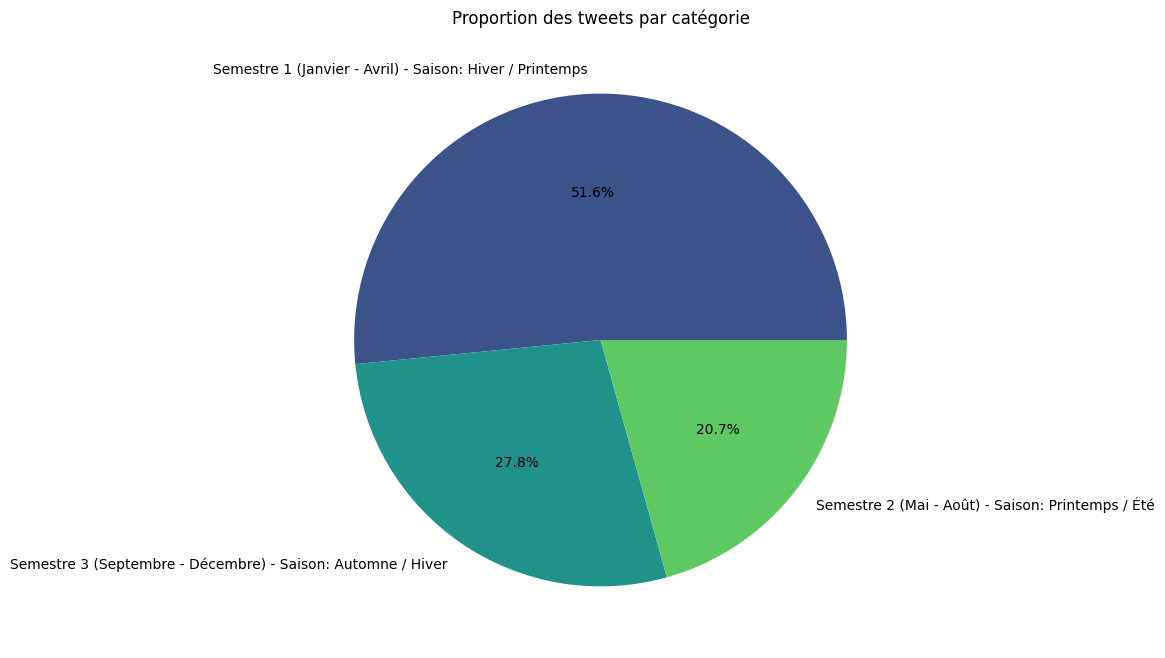

In [88]:

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

category_counts = df['semestre_saison'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel("Catégorie")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.title("Répartition des tweets par catégorie")
plt.show()
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title("Proportion des tweets par catégorie")
plt.show()


C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\3679340518.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


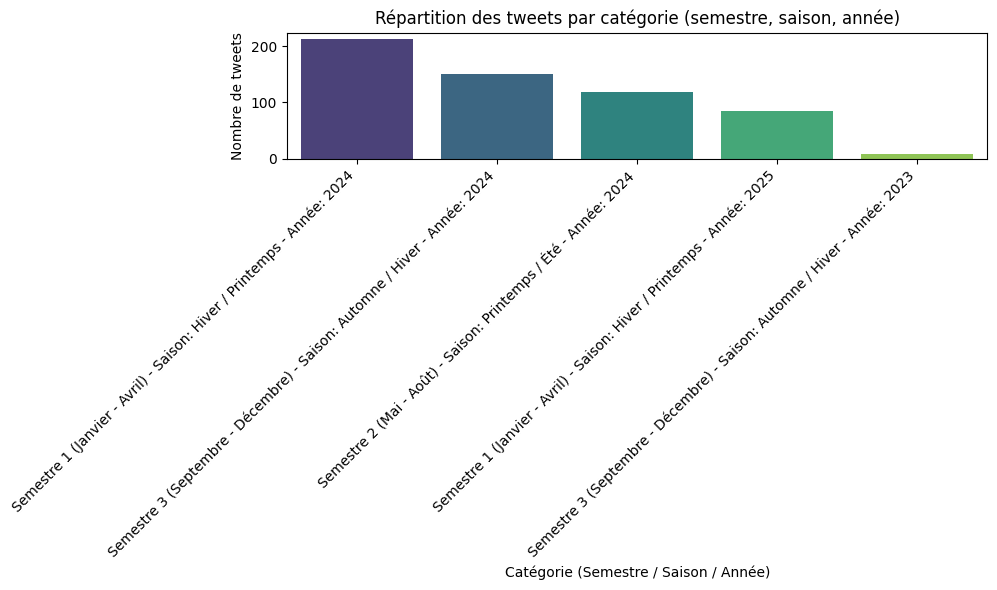

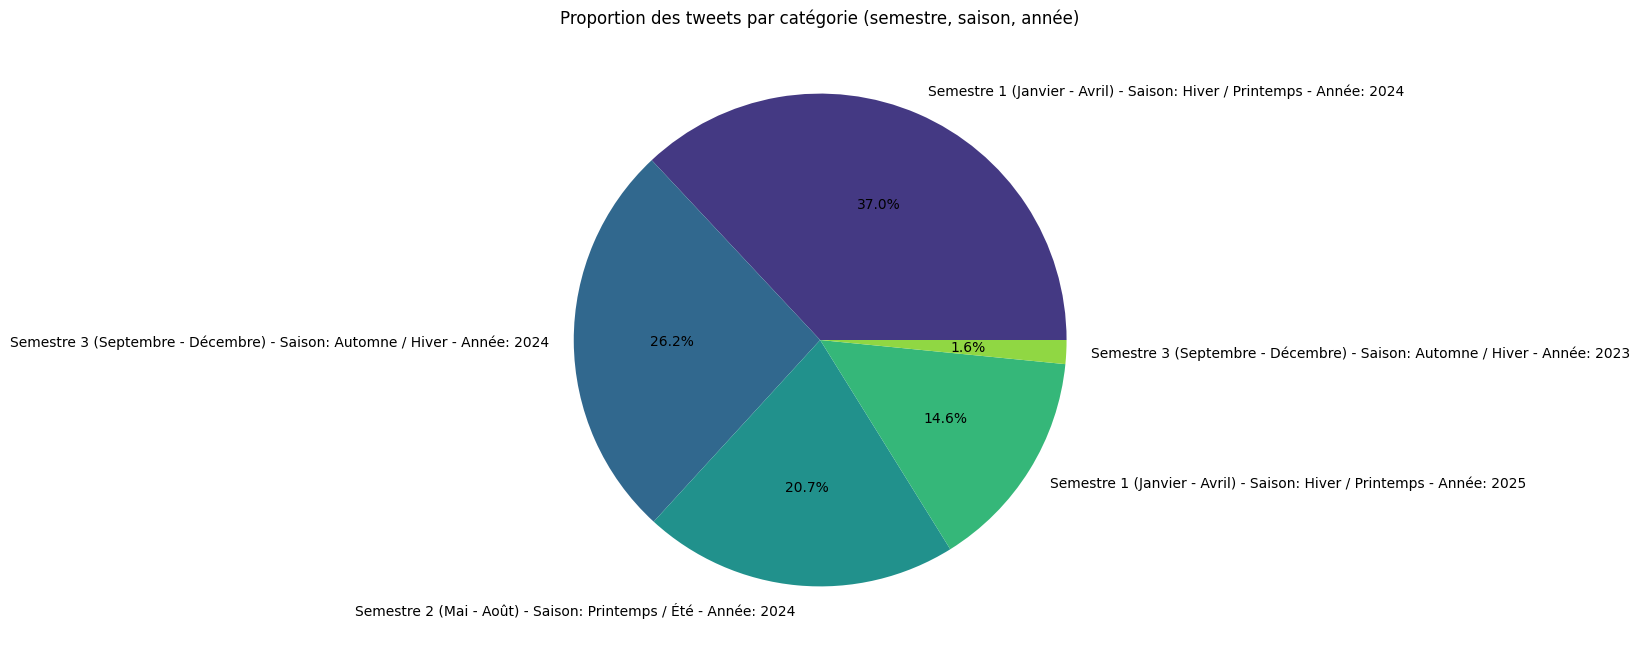

In [89]:

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

df['year'] = pd.to_datetime(df['created_at'], errors='coerce').dt.year

df['semestre_saison_année'] = df['semestre_saison'] + " - Année: " + df['year'].astype(str)

category_counts = df['semestre_saison_année'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel("Catégorie (Semestre / Saison / Année)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des tweets par catégorie (semestre, saison, année)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title("Proportion des tweets par catégorie (semestre, saison, année)")
plt.show()


C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\2776734728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['semestre_saison_année'] = df_filtered['semestre_saison'] + " - Année: " + df_filtered['year'].astype(str)
C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\2776734728.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


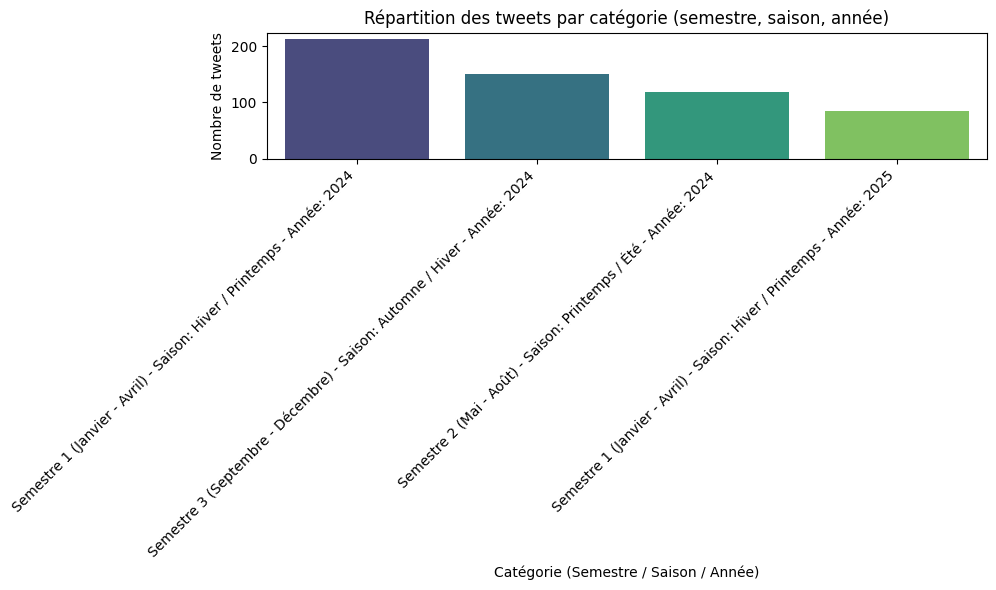

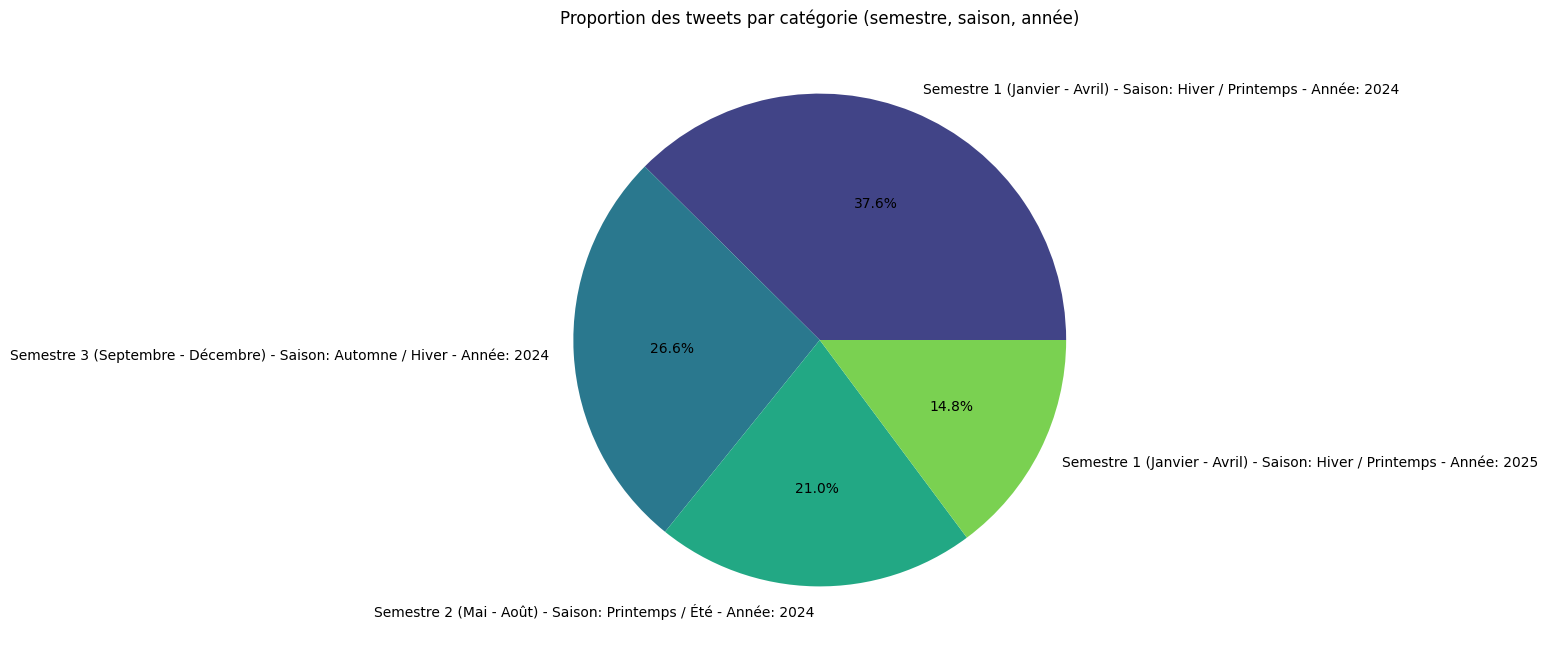

In [90]:

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

df['year'] = pd.to_datetime(df['created_at'], errors='coerce').dt.year

df_filtered = df[df['year'] != 2023]

df_filtered['semestre_saison_année'] = df_filtered['semestre_saison'] + " - Année: " + df_filtered['year'].astype(str)

category_counts = df_filtered['semestre_saison_année'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel("Catégorie (Semestre / Saison / Année)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des tweets par catégorie (semestre, saison, année)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title("Proportion des tweets par catégorie (semestre, saison, année)")
plt.show()


In [91]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

analyzer = SentimentIntensityAnalyzer()

def calculate_severity_with_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    
    compound_score = sentiment_score['compound']
    
    if compound_score <= -0.5:
        return 3
    elif compound_score <= -0.2:
        return 2
    else:
        return 1

df['severity_score'] = df['full_text'].apply(calculate_severity_with_sentiment)

df.to_csv('../Data/tweets_categorises_with_sentiment_severity.csv', index=False)

print("Mise à jour terminée : colonne 'severity_score' basée sur l'analyse de sentiment ajoutée.")


Mise à jour terminée : colonne 'severity_score' basée sur l'analyse de sentiment ajoutée.


C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\3064162066.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')


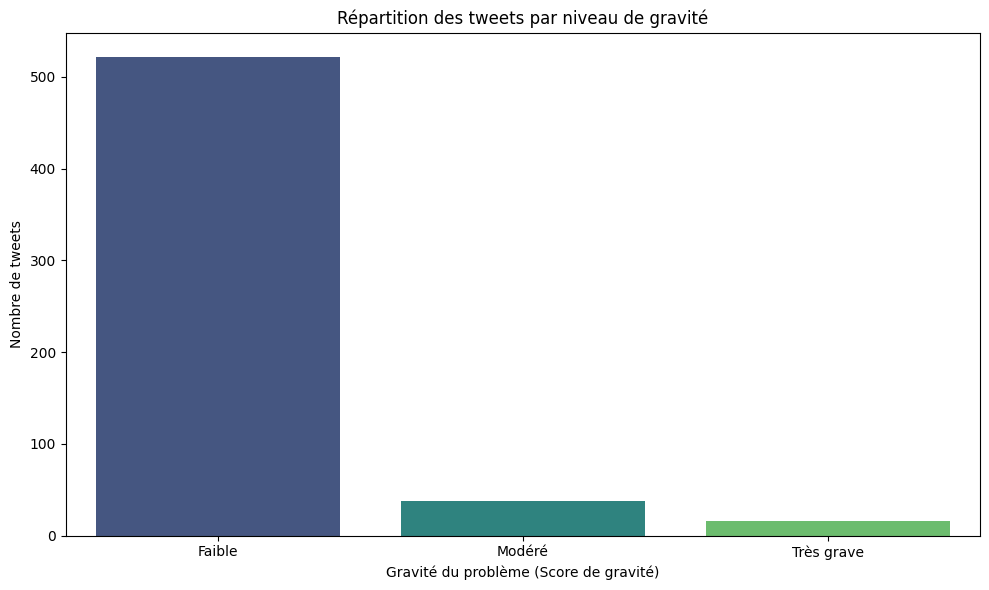

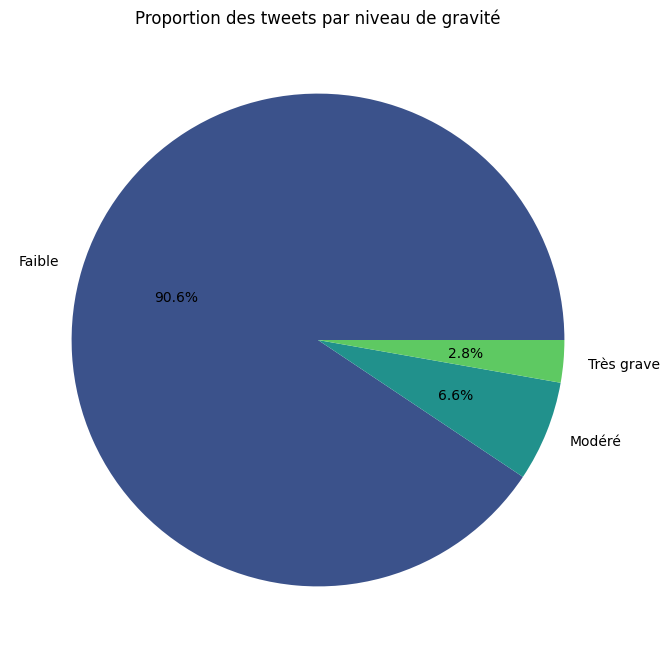

In [92]:

df = pd.read_csv('../Data/tweets_categorises_with_sentiment_severity.csv')

severity_counts = df['severity_score'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')
plt.xlabel("Gravité du problème (Score de gravité)")
plt.ylabel("Nombre de tweets")
plt.title("Répartition des tweets par niveau de gravité")
plt.xticks([0, 1, 2], ['Faible', 'Modéré', 'Très grave'], rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=['Faible', 'Modéré', 'Très grave'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(severity_counts)))
plt.title("Proportion des tweets par niveau de gravité")
plt.show()